# Thông tin về chứng khoán

### Giá mở cửa là gì?
- Giá mở cửa (Open price) là giá đóng cửa của phiên giao dịch hôm trước

### Giá cao nhất là gì?
- Giá cao nhất (High Price) là giá cao nhất trong một phiên phiên giao dịch hoặc trong một chu kỳ theo dõi biến động giá.

### Giá thấp nhất là gì?
- Giá thấp nhất (Low price) trong một phiên giao dịch hoặc trong một chu kỳ theo dõi biến động giá.

### Giá đóng cửa là gì?
- Giá đóng cửa là giá thực hiện tại lần khớp lệnh cuối cùng trong ngày giao dịch.

# Đọc dữ liệu

In [1]:
import pandas as pd

df_fpt = pd.read_csv('https://drive.usercontent.google.com/download?id=1ZDywCbSTKYQW9aYg7EVC50XU0566YtZ9', sep=',')
df_msn = pd.read_csv('https://drive.usercontent.google.com/download?id=1zKEOqsPNS1oc6CYW5OuWh8gBCdvtVuPm', sep=',')
df_pnj = pd.read_csv('https://drive.usercontent.google.com/download?id=1Lh-If839uK7Z-PJGq5SfZVaGVdoCo6YP', sep=',')
df_vic = pd.read_csv('https://drive.usercontent.google.com/download?id=1aMTAq7Oh8J4Gny6O7hPdaozM9RDYIYN4', sep=',')

# Tiền xử lý dữ liệu

Dữ liệu của FPT không có missing

In [2]:
df_fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


Dữ liệu của MSN không có missing

In [3]:
df_msn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


Dữ liệu của PNJ không có missing

In [4]:
df_pnj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB


Dữ liệu của VIC không có missing

In [5]:
df_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


Sắp xếp dữ liệu theo 'Date/Time'

In [6]:
df_fpt['Date/Time'] = pd.to_datetime(df_fpt['Date/Time'])
df_msn['Date/Time'] = pd.to_datetime(df_msn['Date/Time'])
df_pnj['Date/Time'] = pd.to_datetime(df_pnj['Date/Time'])
df_vic['Date/Time'] = pd.to_datetime(df_vic['Date/Time'])

df_fpt = df_fpt.sort_values(by='Date/Time')
df_msn = df_msn.sort_values(by='Date/Time')
df_pnj = df_pnj.sort_values(by='Date/Time')
df_vic = df_vic.sort_values(by='Date/Time')

Xây dựng hàm tính khoảng cách ngày dài nhất không xuất hiện trong dữ liệu

In [7]:
def find_longest_gap_in_dates(df, date_col='Date/Time'):
    unique_dates = df[date_col].dt.date.unique()
    sorted_dates = sorted(unique_dates)

    date_diffs = [sorted_dates[i+1] - sorted_dates[i] for i in range(len(sorted_dates) - 1)]
    max_gap = max(date_diffs)
    max_gap_index = date_diffs.index(max_gap)

    start_date = sorted_dates[max_gap_index]
    end_date = sorted_dates[max_gap_index + 1]

    return max_gap, start_date, end_date

Khoảng cách ngày dài nhất không xuất hiện trong dữ liệu là 10 ngày.

Cho thấy rằng dữ liệu không liên tiếp trong một số khoảng thời gian

In [8]:
print(find_longest_gap_in_dates(df_fpt))
print(find_longest_gap_in_dates(df_msn))
print(find_longest_gap_in_dates(df_pnj))
print(find_longest_gap_in_dates(df_vic))

(datetime.timedelta(days=10), datetime.date(2019, 2, 1), datetime.date(2019, 2, 11))
(datetime.timedelta(days=10), datetime.date(2019, 2, 1), datetime.date(2019, 2, 11))
(datetime.timedelta(days=10), datetime.date(2019, 2, 1), datetime.date(2019, 2, 11))
(datetime.timedelta(days=10), datetime.date(2019, 2, 1), datetime.date(2019, 2, 11))


Ta có:
- Giá close hôm nay sẽ là giá open ngày mai
- Giá open hôm nay là giá close của ngày hôm qua

Xây dựng hàm sinh dữ liệu có thể sinh ra từ suy luận

In [9]:
from datetime import timedelta

def processed_df_1(df):
    columns = ["Ticker", "Date/Time", "Open", "High", "Low", "Close", "Volume", "Open Interest"]
    df_processed = pd.DataFrame(columns=columns)

    unique_dates = df['Date/Time'].dt.date.unique()
    for i in range(len(unique_dates)-1):

        cur_date = unique_dates[i]
        date_data = df[df['Date/Time'].dt.date == cur_date]
        cur_row = date_data[date_data['Date/Time'] == date_data['Date/Time'].max()]

        next_date = unique_dates[i+1]
        next_date_data = df[df['Date/Time'].dt.date == next_date]
        next_row = next_date_data[next_date_data['Date/Time'] == next_date_data['Date/Time'].min()]

        df_processed = pd.concat([df_processed, cur_row], ignore_index=True)

        if (next_date - cur_date) == timedelta(days=2):
            new_row = cur_row.copy()
            new_row['Date/Time'] = cur_date + timedelta(days=1)
            new_row['Open'] = cur_row['Close']
            new_row['Close'] = next_row['Open']
            new_row['High'] = None
            new_row['Low'] = None
            new_row['Volume'] = None
            new_row['Open Interest'] = None
            df_processed = pd.concat([df_processed, new_row], ignore_index=True)

        elif (next_date - cur_date) > timedelta(days=2):
            new_row_1 = cur_row.copy()
            new_row_1['Date/Time'] = cur_date + timedelta(days=1)
            new_row_1['Open'] = cur_row['Close']
            new_row_1['Close'] = None
            new_row_1['High'] = None
            new_row_1['Low'] = None
            new_row_1['Volume'] = None
            new_row_1['Open Interest'] = None
            df_processed = pd.concat([df_processed, new_row_1], ignore_index=True)

            new_row_2 = next_row.copy()
            new_row_2['Date/Time'] = next_date - timedelta(days=1)
            new_row_2['Open'] = None
            new_row_2['Close'] = next_row['Open']
            new_row_2['High'] = None
            new_row_2['Low'] = None
            new_row_2['Volume'] = None
            new_row_2['Open Interest'] = None
            df_processed = pd.concat([df_processed, new_row_2], ignore_index=True)

    cur_date = unique_dates[len(unique_dates) - 1]
    date_data = df[df['Date/Time'].dt.date == cur_date]
    cur_row = date_data[date_data['Date/Time'] == date_data['Date/Time'].max()]

    df_processed = pd.concat([df_processed, cur_row], ignore_index=True)
    df_processed = df_processed.reset_index(drop=True)

    return df_processed

In [10]:
df_fpt_processed_1 = processed_df_1(df_fpt)
df_msn_processed_1 = processed_df_1(df_msn)
df_pnj_processed_1 = processed_df_1(df_pnj)
df_vic_processed_1 = processed_df_1(df_vic)

In [11]:
df_fpt_processed_1

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:21:00,30.66,30.74,30.59,30.66,16480,0
1,FPT,2018-12-26 14:46:00,30.89,30.89,30.89,30.89,23190,0
2,FPT,2018-12-27 14:46:00,31.19,31.19,31.19,31.19,38230,0
3,FPT,2018-12-28 14:46:00,31.49,31.49,31.49,31.49,156050,0
4,FPT,2018-12-29,31.49,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...
703,FPT,2020-12-18 14:46:00,56.90,56.90,56.90,56.90,96550,0
704,FPT,2020-12-19,56.90,NaN,NaN,NaN,None,None
705,FPT,2020-12-20,NaN,NaN,NaN,57.30,None,None
706,FPT,2020-12-21 14:46:00,57.50,57.50,57.50,57.50,92500,0


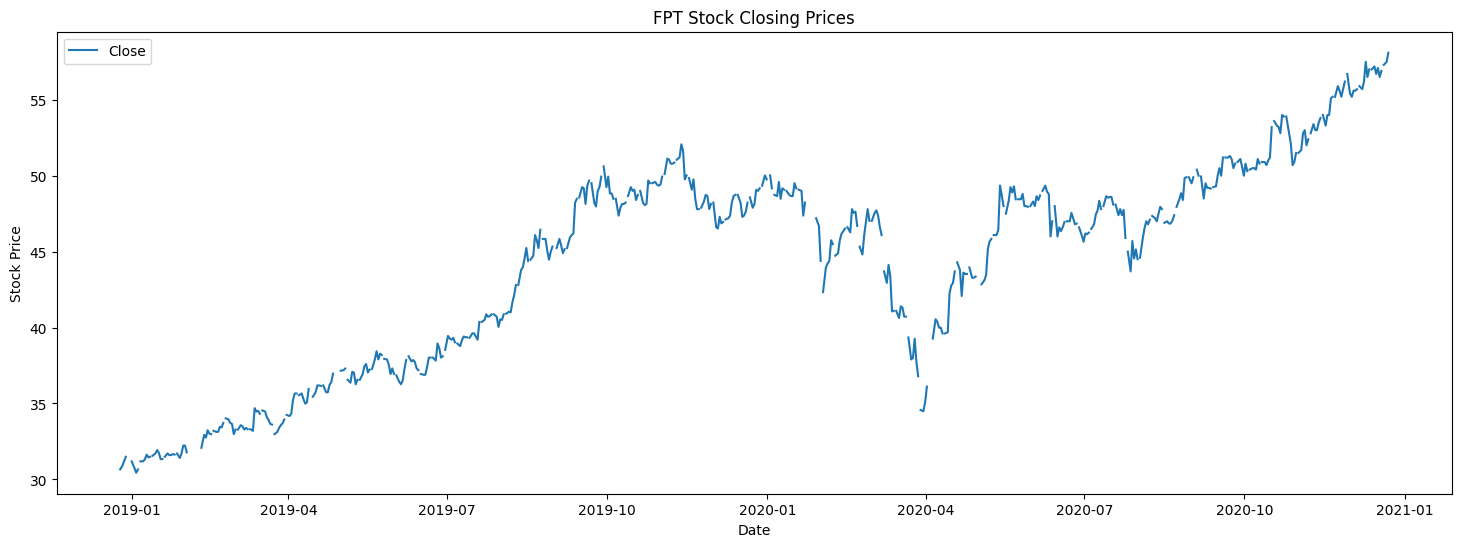

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_fpt_processed_1['Date/Time'], df_fpt_processed_1['Close'])
plt.title('FPT Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Close'])
plt.show()

Xây dựng hàm xử lý dữ liệu null sinh ra từ suy luận và xử lý thêm mẫu cho phần dữ liệu còn thiếu :

- Để giải quyết vấn đề này, chúng tôi có các phương pháp Nội suy.

- Nội suy là một kỹ thuật thường được sử dụng để gán giá trị thiếu chuỗi thời gian.

- Nó giúp ước tính điểm dữ liệu bị thiếu bằng cách sử dụng hai điểm dữ liệu đã biết xung quanh.

- Phương pháp này đơn giản và trực quan nhất. Tuy nhiên, nội suy tiếp tục có các phương pháp phụ sau:

    - Nội suy dựa trên thời gian
    - Nội suy Spline
    - Nội suy tuyến tính

In [13]:
def processed_df_2(df):
    df = df.set_index('Date/Time')
    df.index = pd.to_datetime(df.index)
    df.index = df.index.strftime('%Y-%m-%d')
    df.index = pd.to_datetime(df.index)

    df_resampled = df.resample('D').asfreq()
    df_resampled['Open'] = df_resampled['Open'].interpolate(method='time')
    df_resampled['Close'] = df_resampled['Close'].interpolate(method='time')
    df_resampled = df_resampled.assign(Ticker=df['Ticker'].iloc[0])

    return df_resampled


In [14]:
df_fpt_processed_2 = processed_df_2(df_fpt_processed_1)
df_msn_processed_2 = processed_df_2(df_msn_processed_1)
df_pnj_processed_2 = processed_df_2(df_pnj_processed_1)
df_vic_processed_2 = processed_df_2(df_vic_processed_1)

In [15]:
df_fpt_processed_2

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-12-25,FPT,30.66,30.74,30.59,30.660,16480,0
2018-12-26,FPT,30.89,30.89,30.89,30.890,23190,0
2018-12-27,FPT,31.19,31.19,31.19,31.190,38230,0
2018-12-28,FPT,31.49,31.49,31.49,31.490,156050,0
2018-12-29,FPT,31.49,NaN,NaN,31.415,None,None
...,...,...,...,...,...,...,...
2020-12-18,FPT,56.90,56.90,56.90,56.900,96550,0
2020-12-19,FPT,56.90,NaN,NaN,57.100,None,None
2020-12-20,FPT,57.20,NaN,NaN,57.300,None,None


Dữ liệu đã được xử lý xong

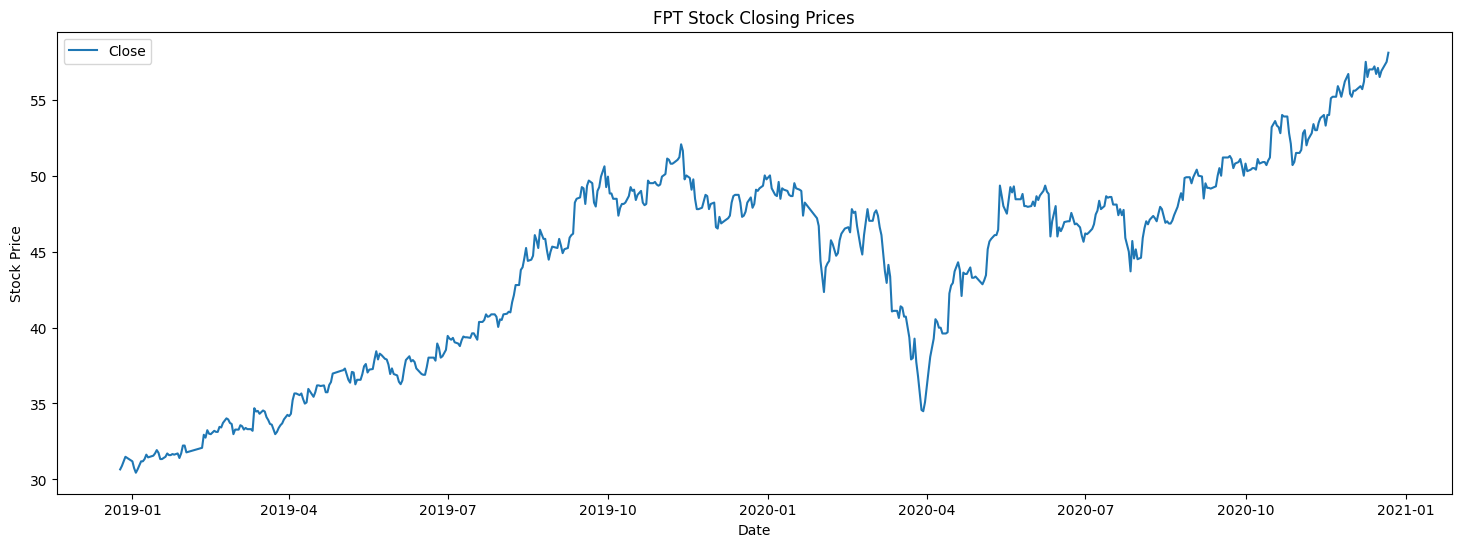

In [16]:
plt.figure(figsize=(18, 6))
plt.plot(df_fpt_processed_2.index, df_fpt_processed_2['Close'])
plt.title('FPT Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Close'])
plt.show()

Xem xét đến tính tuần hoàn của dữ liệu

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(18, 6))
    decompose_result.observed.plot(ax=ax1)
    ax1.set_ylabel("Observed",fontsize = 14)

    decompose_result.trend.plot(ax=ax2)
    ax2.set_ylabel("Trend",fontsize = 14)

    decompose_result.seasonal.plot(ax=ax3)
    ax3.set_ylabel("Seasonal",fontsize = 14)

    decompose_result.resid.plot(ax=ax4)
    ax4.set_ylabel("Residual",fontsize = 14)

- Dựa vào các biểu đồ sau ta chưa thể đưa ra được chu kỳ lặp lại của giá cổ phiếu khi đóng cửa, với dữ liệu hiện tại

- Vậy nên giá trị ước lượng về chu kỳ lặp lặi dưới đây sẽ không dùng cho việc để thực hiện đào tạo mô hình

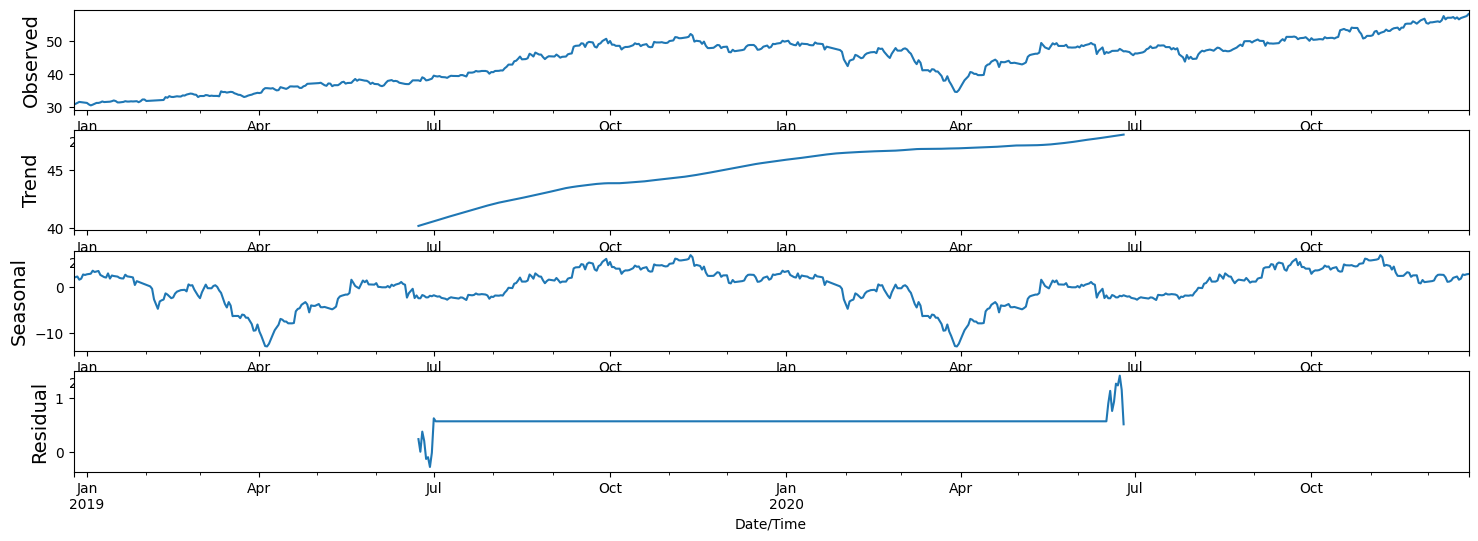

In [18]:
fpt_seasonal_periodicity = 360
decomposition = seasonal_decompose(df_fpt_processed_2['Close'], period=fpt_seasonal_periodicity)
plot_decompose(decomposition)

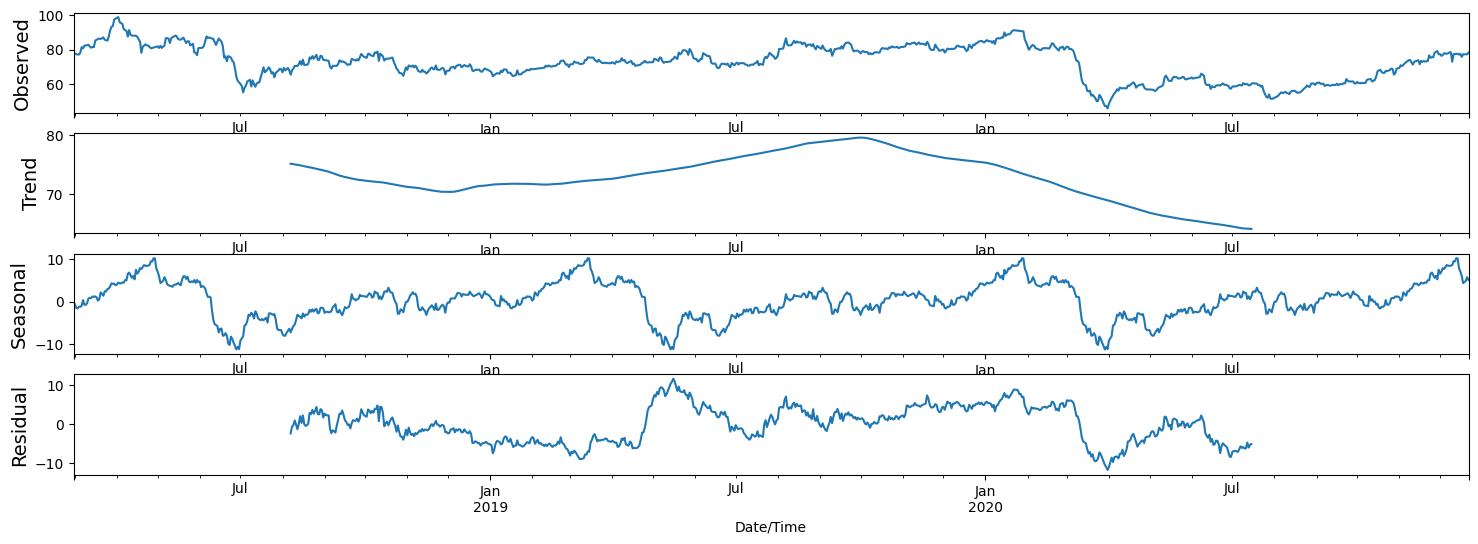

In [19]:
pnj_seasonal_periodicity = 320
decomposition = seasonal_decompose(df_pnj_processed_2['Close'], period=pnj_seasonal_periodicity)
plot_decompose(decomposition)

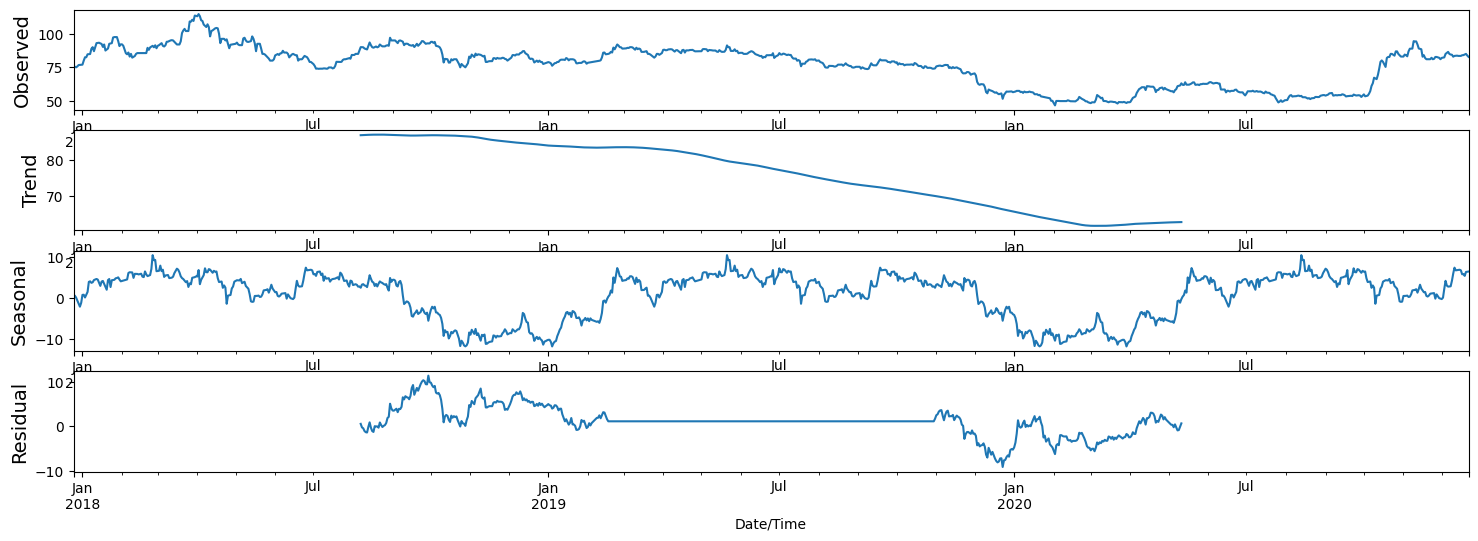

In [20]:
msn_seasonal_periodicity = 450
decomposition = seasonal_decompose(df_msn_processed_2['Close'], period=msn_seasonal_periodicity)
plot_decompose(decomposition)

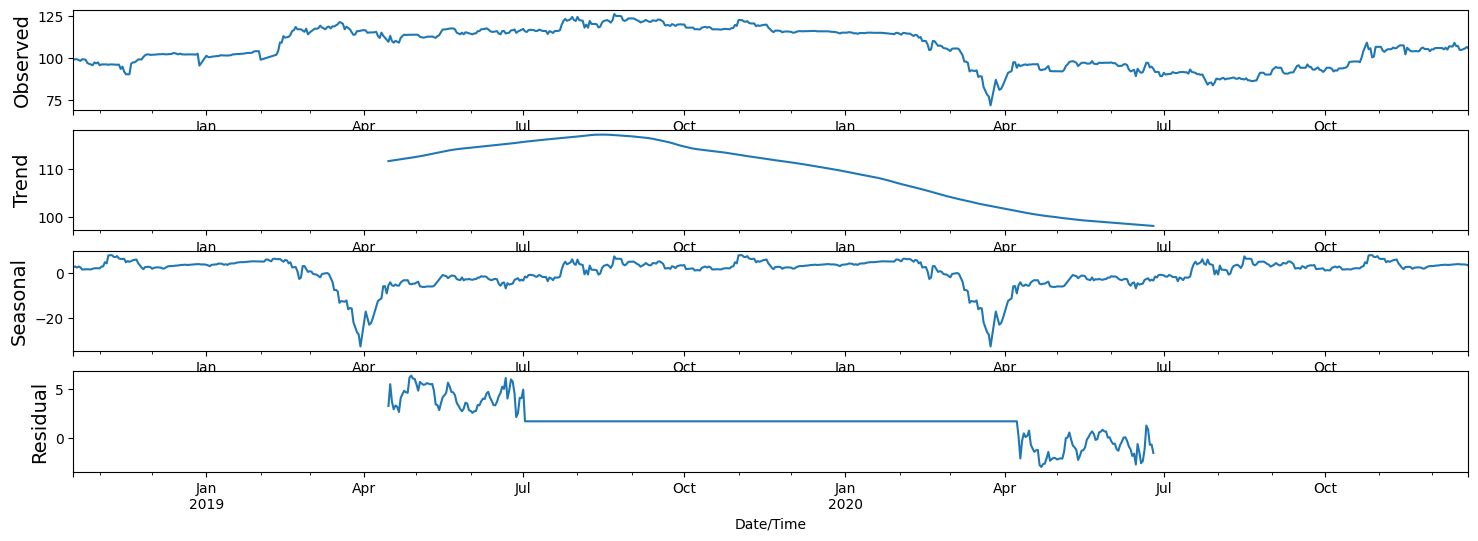

In [21]:
vic_seasonal_periodicity = 360
decomposition = seasonal_decompose(df_vic_processed_2['Close'], period=vic_seasonal_periodicity)
plot_decompose(decomposition)

# Xây dựng mô hình dự đoán theo ngày

### Dự đoán giá close

Chọn thuộc tính cần dự đoán

In [22]:
target = 'Close'
sub_df_fpt = df_fpt_processed_2[target]
sub_df_msn = df_fpt_processed_2[target]
sub_df_pnj = df_fpt_processed_2[target]
sub_df_vic = df_fpt_processed_2[target]

Lấy ra dữ liệu của thuộc tính cần dự đoán tự tập dữ liệu

In [23]:
sub_df_fpt = sub_df_fpt.values.reshape(sub_df_fpt.shape[0], 1)
sub_df_msn = sub_df_msn.values.reshape(sub_df_msn.shape[0], 1)
sub_df_pnj = sub_df_pnj.values.reshape(sub_df_pnj.shape[0], 1)
sub_df_vic = sub_df_vic.values.reshape(sub_df_vic.shape[0], 1)

Chọn thang chuẩn hóa

In [24]:
from sklearn.preprocessing import MinMaxScaler

mms_fpt = MinMaxScaler()
mms_msn = MinMaxScaler()
mms_pnj = MinMaxScaler()
mms_vic = MinMaxScaler()

Chuẩn hóa dữ liệu dùng MinMaxScaler

In [25]:
sub_df_fpt = mms_fpt.fit_transform(sub_df_fpt)
sub_df_msn = mms_msn.fit_transform(sub_df_msn)
sub_df_pnj = mms_pnj.fit_transform(sub_df_pnj)
sub_df_vic = mms_vic.fit_transform(sub_df_vic)

Chia tập dữ liệu

In [26]:
import numpy as np

def process_Data(data, lookback):
    X,Y = [], []

    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        Y.append(data[(i + lookback), 0])

    return np.array(X), np.array(Y)

In [27]:
def spit_Data_Train(data, lookback=7, train=0.80):
    X, Y = process_Data(data, lookback)

    X_train, X_test = X[:int(X.shape[0] * train)], X[int(X.shape[0] * train):]
    Y_train, Y_test = Y[:int(Y.shape[0] * train)], Y[int(Y.shape[0] * train):]

    return X_train, X_test, Y_train, Y_test

In [28]:
X_train_fpt, X_test_fpt, Y_train_fpt, Y_test_fpt = spit_Data_Train(sub_df_fpt, 7, 0.8)
X_train_msn, X_test_msn, Y_train_msn, Y_test_msn = spit_Data_Train(sub_df_fpt, 7, 0.8)
X_train_pnj, X_test_pnj, Y_train_pnj, Y_test_pnj = spit_Data_Train(sub_df_fpt, 7, 0.8)
X_train_vic, X_test_vic, Y_train_vic, Y_test_vic = spit_Data_Train(sub_df_fpt, 7, 0.8)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

Xây dựng mô hình RNN LSTM

In [30]:
def building_RNN_LSTM_model(units, input_shape):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [31]:
model_fpt = building_RNN_LSTM_model(128, (7, 1))
model_msn = building_RNN_LSTM_model(128, (7, 1))
model_pnj = building_RNN_LSTM_model(128, (7, 1))
model_vic = building_RNN_LSTM_model(128, (7, 1))


In [32]:
X_train_fpt = X_train_fpt.reshape((X_train_fpt.shape[0], X_train_fpt.shape[1], 1))
X_test_fpt = X_test_fpt.reshape((X_test_fpt.shape[0], X_test_fpt.shape[1], 1))

X_train_msn = X_train_msn.reshape((X_train_msn.shape[0], X_train_msn.shape[1], 1))
X_test_msn = X_test_msn.reshape((X_test_msn.shape[0], X_test_msn.shape[1], 1))

X_train_pnj = X_train_pnj.reshape((X_train_pnj.shape[0], X_train_pnj.shape[1], 1))
X_test_pnj = X_test_pnj.reshape((X_test_pnj.shape[0], X_test_pnj.shape[1], 1))

X_train_vic = X_train_vic.reshape((X_train_vic.shape[0], X_train_vic.shape[1], 1))
X_test_vic = X_test_vic.reshape((X_test_vic.shape[0], X_test_vic.shape[1], 1))

In [33]:
epochs = 512

In [34]:
hist_fpt = model_fpt.fit(X_train_fpt, Y_train_fpt, epochs=epochs, validation_data=(X_test_fpt, Y_test_fpt), shuffle=True)

Epoch 1/512
18/18 [==============================] - 3s 45ms/step - loss: 0.0462 - val_loss: 0.0022
Epoch 2/512
18/18 [==============================] - 0s 14ms/step - loss: 0.0049 - val_loss: 9.0351e-04
Epoch 3/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 4/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 8.5496e-04
Epoch 6/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 8.0351e-04
Epoch 7/512
18/18 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 8.0908e-04
Epoch 8/512
18/18 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 8.5085e-04
Epoch 9/512
18/18 [==============================] - 0s 17ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/512
18/18 [==============================] - 0s 16ms/step - loss: 0.001

In [35]:
hist_msn = model_msn.fit(X_train_msn, Y_train_msn, epochs=epochs, validation_data=(X_test_msn, Y_test_msn), shuffle=True)

Epoch 1/512
18/18 [==============================] - 3s 48ms/step - loss: 0.0529 - val_loss: 0.0013
Epoch 2/512
18/18 [==============================] - 0s 17ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 3/512
18/18 [==============================] - 0s 17ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 4/512
18/18 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 5/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 8.7076e-04
Epoch 6/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/512
18/18 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 9.6616e-04
Epoch 8/512
18/18 [==============================] - 0s 17ms/step - loss: 0.0017 - val_loss: 9.3267e-04
Epoch 9/512
18/18 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 8.1389e-04
Epoch 10/512
18/18 [==============================] - 0s 14ms/step - loss: 0.0017 - 

In [36]:
hist_pnj = model_pnj.fit(X_train_pnj, Y_train_pnj, epochs=epochs, validation_data=(X_test_pnj, Y_test_pnj), shuffle=True)

Epoch 1/512
18/18 [==============================] - 3s 45ms/step - loss: 0.0751 - val_loss: 0.0081
Epoch 2/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 3/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 4/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 9.2426e-04
Epoch 5/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 6/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 9/512
18/18 [==============================] - 0s 18ms/step - loss: 0.0019 - val_loss: 9.2593e-04
Epoch 10/512
18/18 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss

In [37]:
hist_vic = model_vic.fit(X_train_vic, Y_train_vic, epochs=epochs, validation_data=(X_test_vic, Y_test_vic), shuffle=True)

Epoch 1/512
18/18 [==============================] - 3s 42ms/step - loss: 0.0735 - val_loss: 0.0080
Epoch 2/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0075 - val_loss: 0.0066
Epoch 3/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0034 - val_loss: 0.0048
Epoch 4/512
18/18 [==============================] - 0s 15ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 5/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 9.4247e-04
Epoch 6/512
18/18 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 9.0603e-04
Epoch 7/512
18/18 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 8/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/512
18/18 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 10/512
18/18 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss

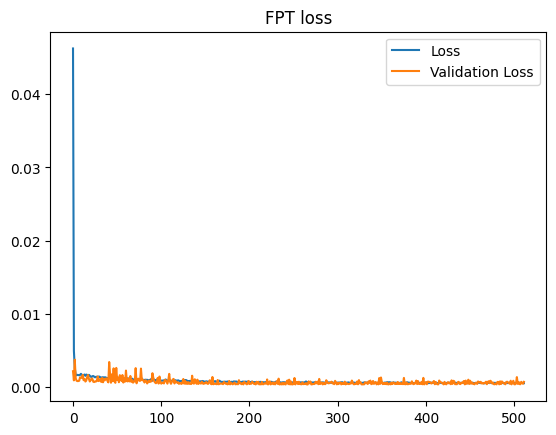

In [38]:
plt.title('FPT loss')
plt.plot(hist_fpt.history['loss'])
plt.plot(hist_fpt.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'], loc='upper right')

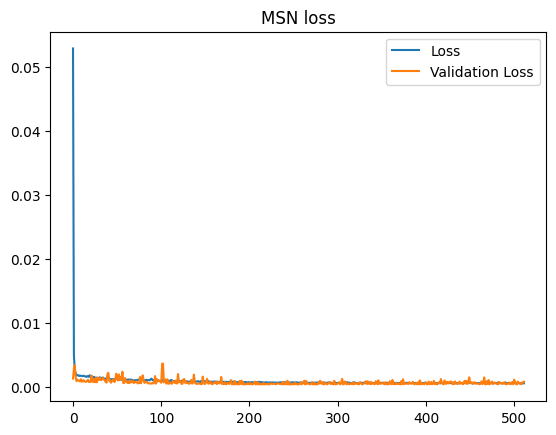

In [39]:
plt.title('MSN loss')
plt.plot(hist_msn.history['loss'])
plt.plot(hist_msn.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'], loc='upper right')

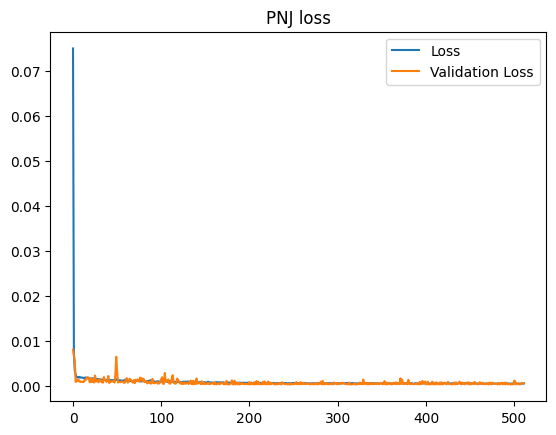

In [40]:
plt.title('PNJ loss')
plt.plot(hist_pnj.history['loss'])
plt.plot(hist_pnj.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'], loc='upper right')

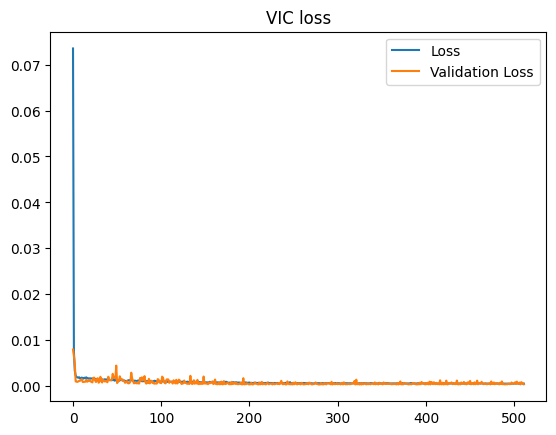

In [41]:
plt.title('VIC loss')
plt.plot(hist_vic.history['loss'])
plt.plot(hist_vic.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'], loc='upper right')

5/5 [==============================] - 0s 5ms/step
56.43
98.88


<ipython-input-42-822808558e1c>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ploss = round(float(ploss / len(rval)), 2)


Text(0.5, 0, 'Days')

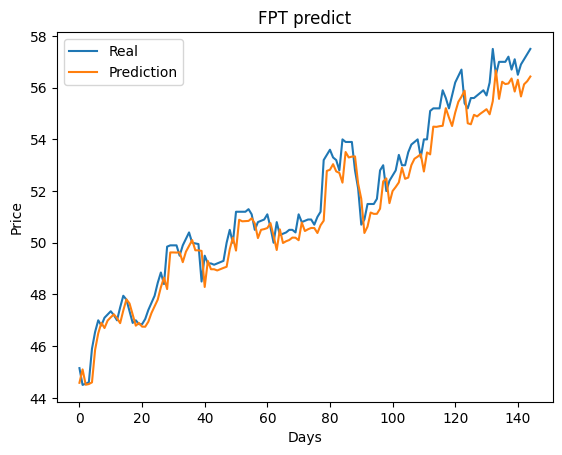

In [42]:
i = Y_test_fpt.shape[0] - 1
Xt = model_fpt.predict(X_test_fpt[i].reshape(1, 7, 1))
pprice = mms_fpt.inverse_transform(Xt).copy()
pprice = round(float(pprice.tolist()[0][0]), 2)

Xt = model_fpt.predict(X_test_fpt)
rval = mms_fpt.inverse_transform(Y_test_fpt.reshape(-1, 1))
pval = mms_fpt.inverse_transform(Xt)

ploss = 0
for i in range(len(rval)):
    ploss += abs((rval[i] - pval[i]) / rval[i]) * 100

ploss = round(float(ploss / len(rval)), 2)
acr = 100 - ploss

tostore = [str(pprice), str(acr)]
for listitem in tostore:
    print(listitem)

plt.title('FPT predict')
plt.plot(rval)
plt.plot(pval)
plt.legend(['Real', 'Prediction'], loc='upper left')
plt.ylabel('Price')
plt.xlabel('Days')

5/5 [==============================] - 0s 8ms/step
56.39
98.79


<ipython-input-43-6ba1cbf62db9>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ploss = round(float(ploss / len(rval)), 2)


Text(0.5, 0, 'Days')

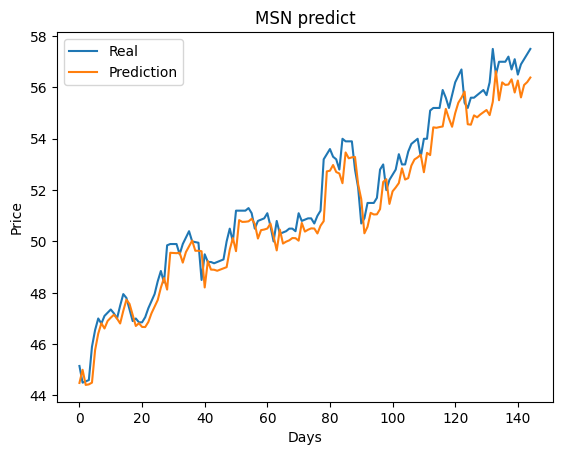

In [43]:
i = Y_test_msn.shape[0] - 1
Xt = model_msn.predict(X_test_msn[i].reshape(1, 7, 1))
pprice = mms_msn.inverse_transform(Xt).copy()
pprice = round(float(pprice.tolist()[0][0]), 2)

Xt = model_msn.predict(X_test_msn)
rval = mms_msn.inverse_transform(Y_test_msn.reshape(-1, 1))
pval = mms_msn.inverse_transform(Xt)

ploss = 0
for i in range(len(rval)):
    ploss += abs((rval[i] - pval[i]) / rval[i]) * 100

ploss = round(float(ploss / len(rval)), 2)
acr = 100 - ploss

tostore = [str(pprice), str(acr)]
for listitem in tostore:
    print(listitem)

plt.title('MSN predict')
plt.plot(rval)
plt.plot(pval)
plt.legend(['Real', 'Prediction'], loc='upper left')
plt.ylabel('Price')
plt.xlabel('Days')

5/5 [==============================] - 0s 6ms/step
56.52
98.95


<ipython-input-44-8148600c6df8>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ploss = round(float(ploss / len(rval)), 2)


Text(0.5, 0, 'Days')

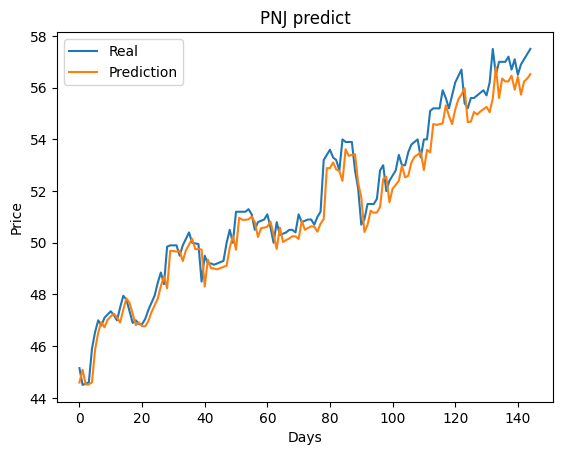

In [44]:
i = Y_test_pnj.shape[0] - 1
Xt = model_pnj.predict(X_test_pnj[i].reshape(1, 7, 1))
pprice = mms_pnj.inverse_transform(Xt).copy()
pprice = round(float(pprice.tolist()[0][0]), 2)

Xt = model_pnj.predict(X_test_pnj)
rval = mms_pnj.inverse_transform(Y_test_pnj.reshape(-1, 1))
pval = mms_pnj.inverse_transform(Xt)

ploss = 0
for i in range(len(rval)):
    ploss += abs((rval[i] - pval[i]) / rval[i]) * 100

ploss = round(float(ploss / len(rval)), 2)
acr = 100 - ploss

tostore = [str(pprice), str(acr)]
for listitem in tostore:
    print(listitem)

plt.title('PNJ predict')
plt.plot(rval)
plt.plot(pval)
plt.legend(['Real', 'Prediction'], loc='upper left')
plt.ylabel('Price')
plt.xlabel('Days')

5/5 [==============================] - 0s 5ms/step
56.92
99.24


<ipython-input-45-3fa5ac09b4f2>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ploss = round(float(ploss / len(rval)), 2)


Text(0.5, 0, 'Days')

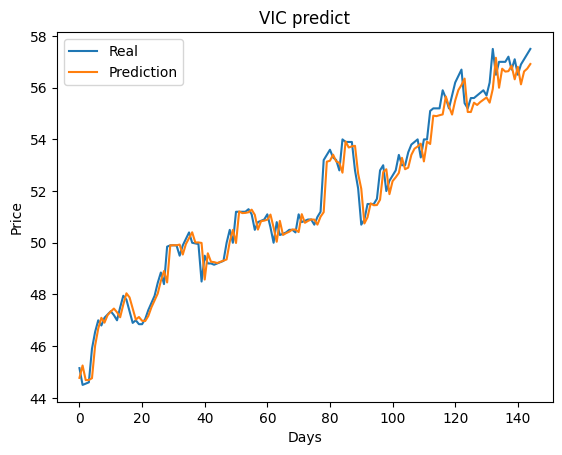

In [45]:
i = Y_test_vic.shape[0] - 1
Xt = model_vic.predict(X_test_vic[i].reshape(1, 7, 1))
pprice = mms_vic.inverse_transform(Xt).copy()
pprice = round(float(pprice.tolist()[0][0]), 2)

Xt = model_vic.predict(X_test_vic)
rval = mms_vic.inverse_transform(Y_test_vic.reshape(-1, 1))
pval = mms_vic.inverse_transform(Xt)

ploss = 0
for i in range(len(rval)):
    ploss += abs((rval[i] - pval[i]) / rval[i]) * 100

ploss = round(float(ploss / len(rval)), 2)
acr = 100 - ploss

tostore = [str(pprice), str(acr)]
for listitem in tostore:
    print(listitem)

plt.title('VIC predict')
plt.plot(rval)
plt.plot(pval)
plt.legend(['Real', 'Prediction'], loc='upper left')
plt.ylabel('Price')
plt.xlabel('Days')